In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T
import torch
img_path=("E:/ai_service/notebook/K-039148_0_2_1_2_60_220_200.png")

img=Image.open(img_path).convert("RGB")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.004795..1.733682].


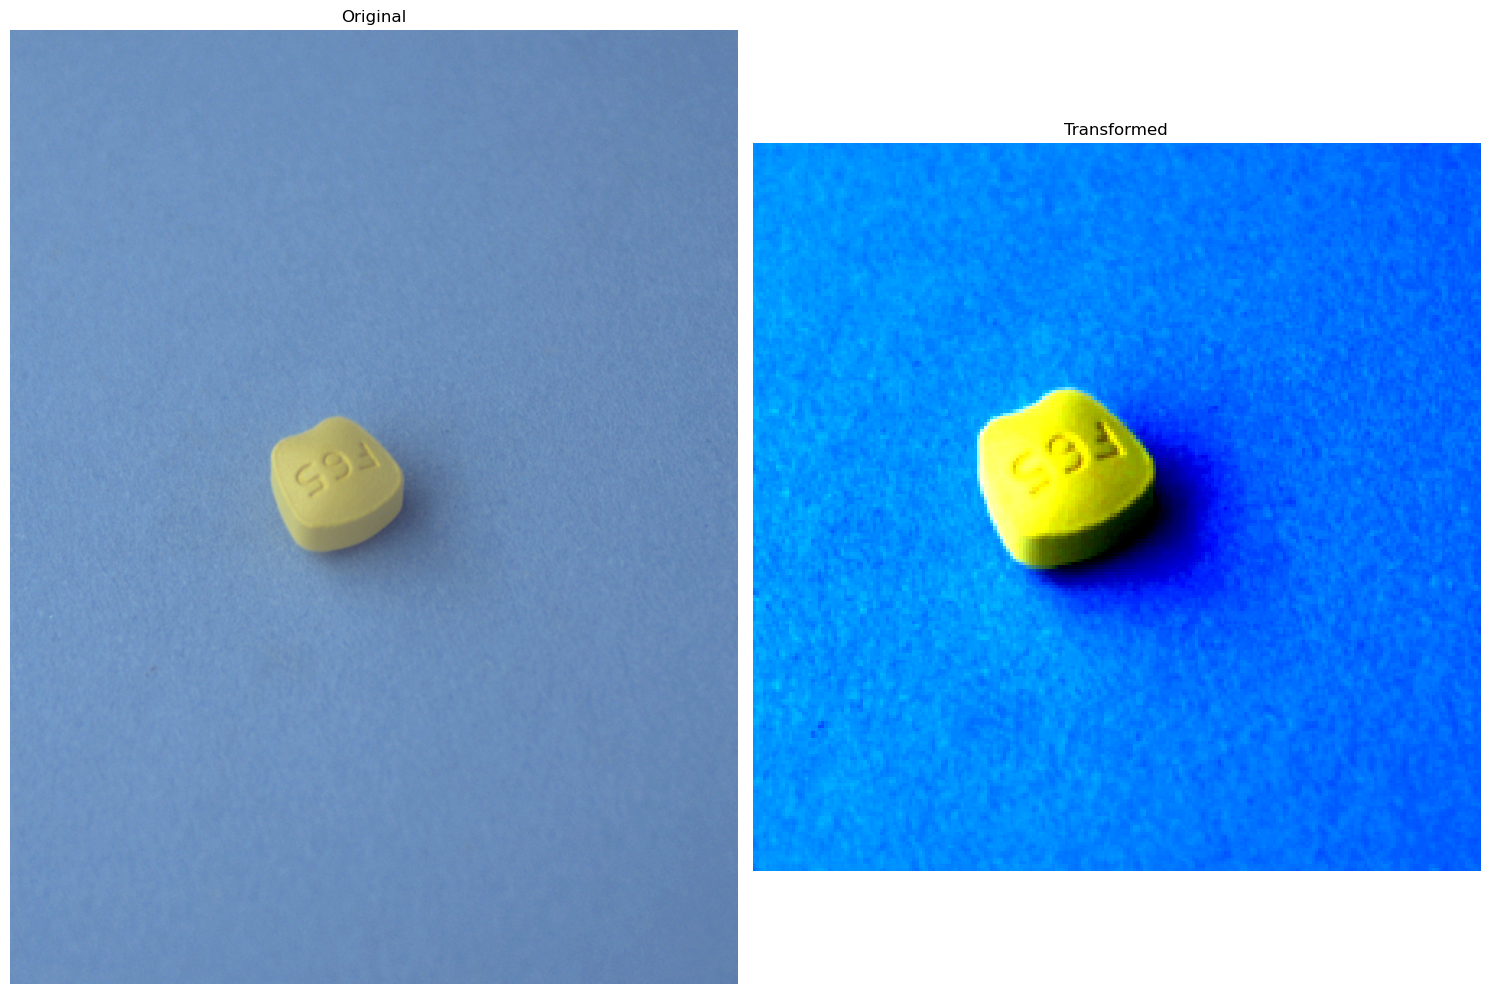

In [8]:
transform = T.Compose([
    T.Resize((300)),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
transform2 = T.Compose([
    
    T.CenterCrop(300),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
transformed_image = transform(img)
def show_images(original, transformed_tensor):
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))

    # 원본 이미지
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[0].axis("off")

    # Transform된 이미지 (tensor → numpy)
    transformed_np = transformed_tensor.permute(1, 2, 0).numpy()
    ax[1].imshow(transformed_np)
    ax[1].set_title("Transformed")
    ax[1].axis("off")

    plt.tight_layout()
    plt.show()
show_images(img, transformed_image)

In [2]:
print("hi")


hi
